In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("/workspaces/EDA_4/data/processed/conditions_per_state.csv")
df.head()

,STATE_NAME,Median_Household_Income_2018,Percent of Population Aged 60+,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence
0,Alabama,43479.820896,23.861194,53.026866,38.273134,9.616418,10.679104,16.232836,3.858209
1,Alaska,64079.000000,17.985185,42.403704,32.048148,7.448148,8.188889,11.970370,3.181481
2,Arizona,49105.866667,26.046667,45.293333,32.160000,9.000000,8.940000,13.040000,3.973333
3,Arkansas,41801.373333,25.332000,50.680000,36.868000,10.230667,10.697333,14.882667,3.789333
4,California,67098.655172,23.184483,38.218966,27.813793,6.901724,6.922414,11.325862,3.246552


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df_uni = df.drop('STATE_NAME', axis = 1)

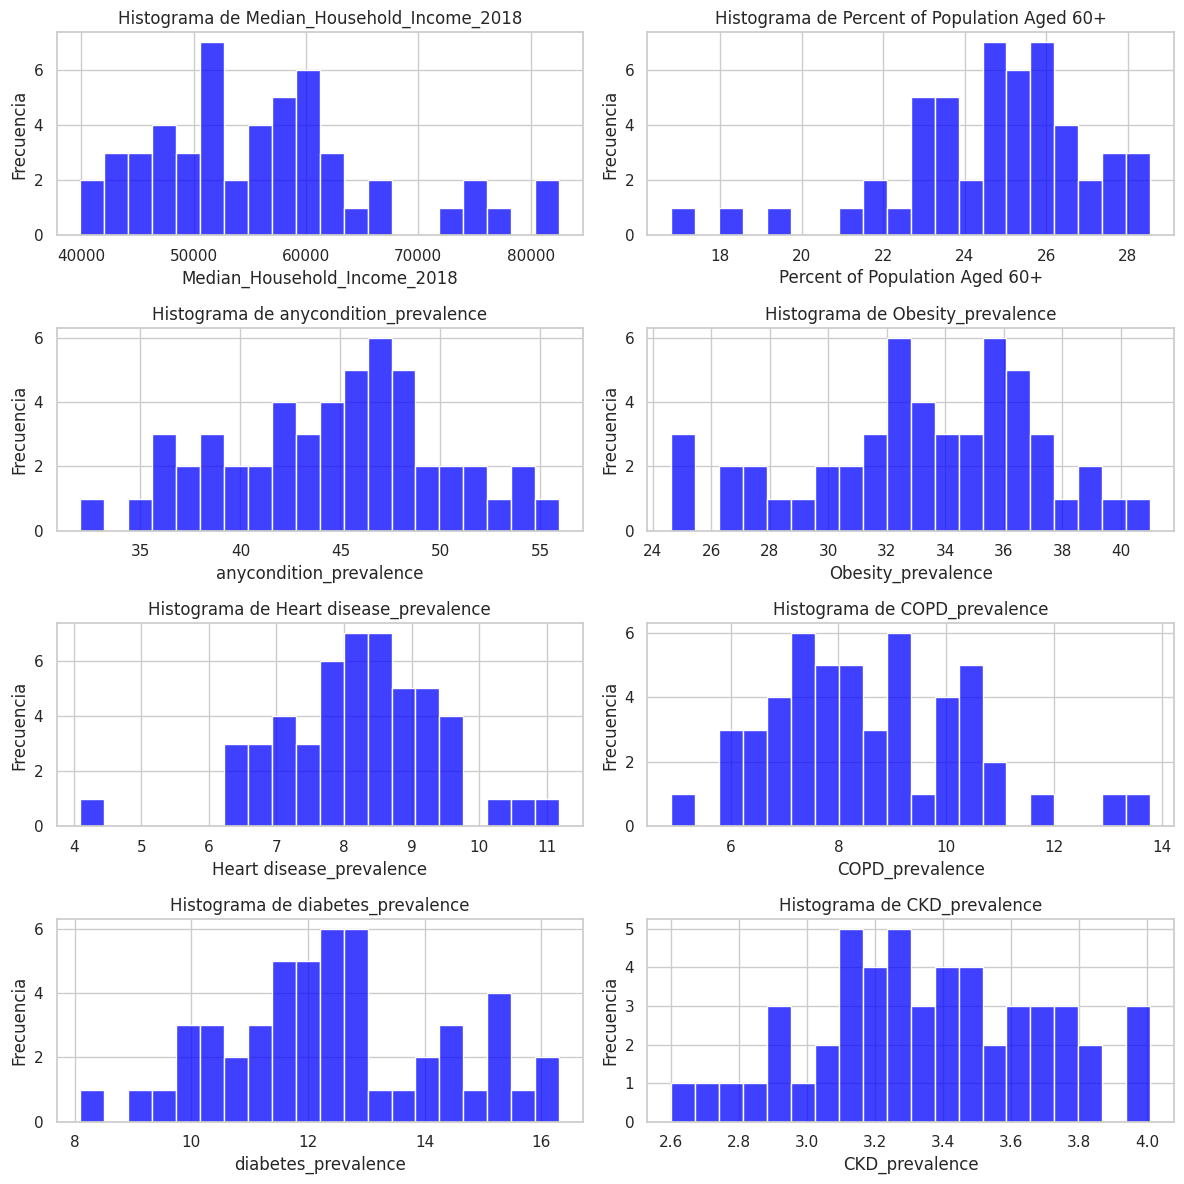

In [10]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Obtener el número de columnas en el DataFrame
num_columns = len(df_uni.columns)

# Establecer el número de subgráficos por fila
num_subplots_per_row = 2

# Calcular el número total de filas necesarias
num_rows = (num_columns + num_subplots_per_row - 1) // num_subplots_per_row

# Crear subgráficos
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, 3 * num_rows))

# Aplanar la matriz de subgráficos para facilitar la iteración
axes = axes.flatten()

# Iterar por cada columna y crear un histograma
for i, column in enumerate(df_uni.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=False, bins=20, color='blue', ax=ax)  # Puedes ajustar los parámetros según tus preferencias
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

In [11]:
df["STATE_NAME"] = pd.factorize(df["STATE_NAME"])[0]

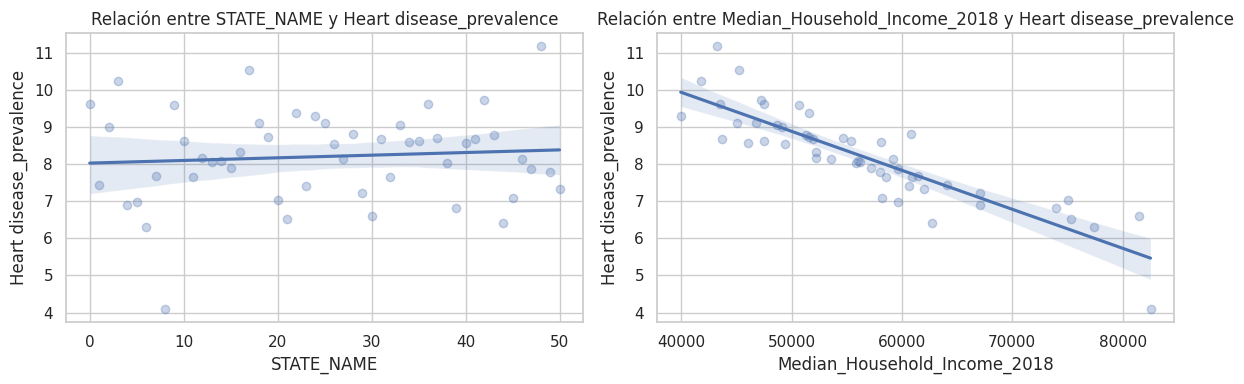

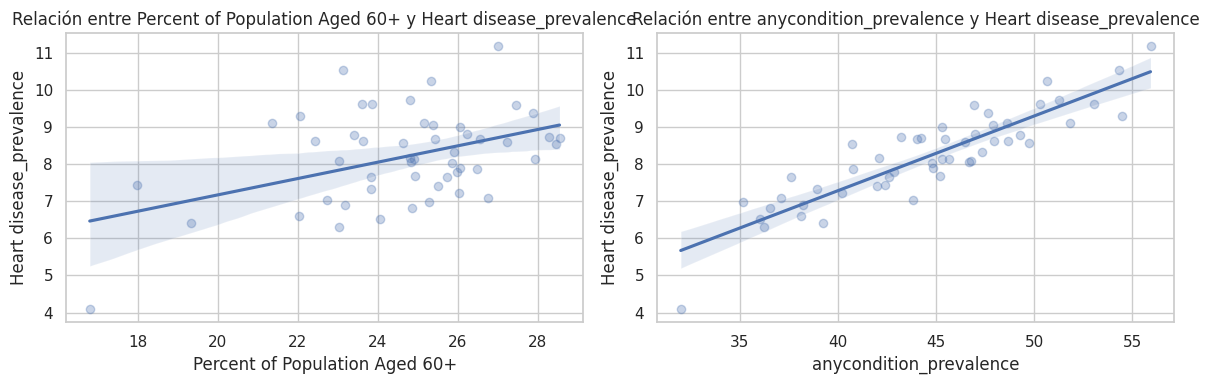

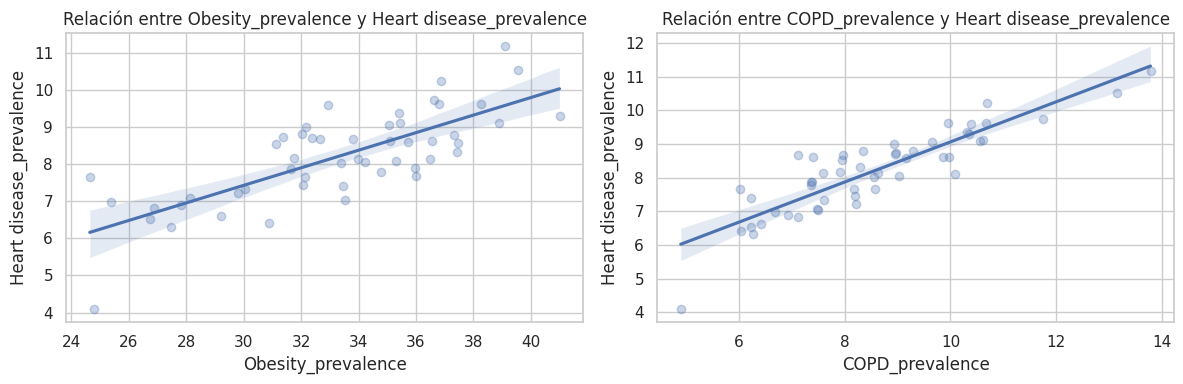

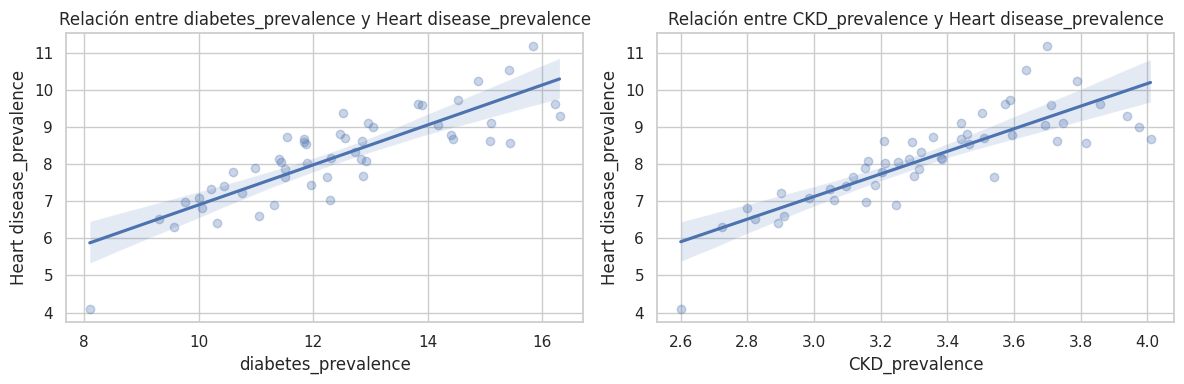

In [12]:
target_column = 'Heart disease_prevalence'

feature_columns = [col for col in df.columns if col != target_column]

# Dividir las columnas en pares
column_pairs = [(feature_columns[i], feature_columns[i+1]) for i in range(0, len(feature_columns), 2)]

# Iterar a través de los pares de columnas y trazar regplots
for pair in column_pairs:
    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Iterar sobre las dos columnas del par
    for i, feature_column in enumerate(pair):
        # Crear un gráfico de dispersión con línea de regresión
        sns.regplot(x=feature_column, y=target_column, data=df, scatter_kws={'alpha':0.3}, ax=axes[i])
        
        # Configuración del título y etiquetas
        axes[i].set_title(f'Relación entre {feature_column} y {target_column}')
        axes[i].set_xlabel(feature_column)
        axes[i].set_ylabel(target_column)
    
    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

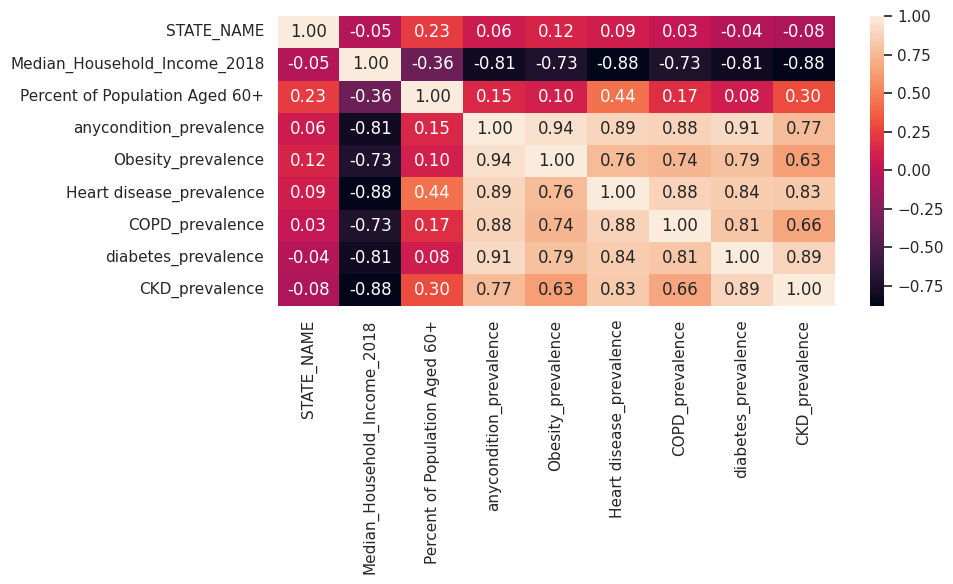

In [13]:
fig, axis = plt.subplots(figsize = (10, 6))
lista_de_columnas = df.columns.tolist()
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

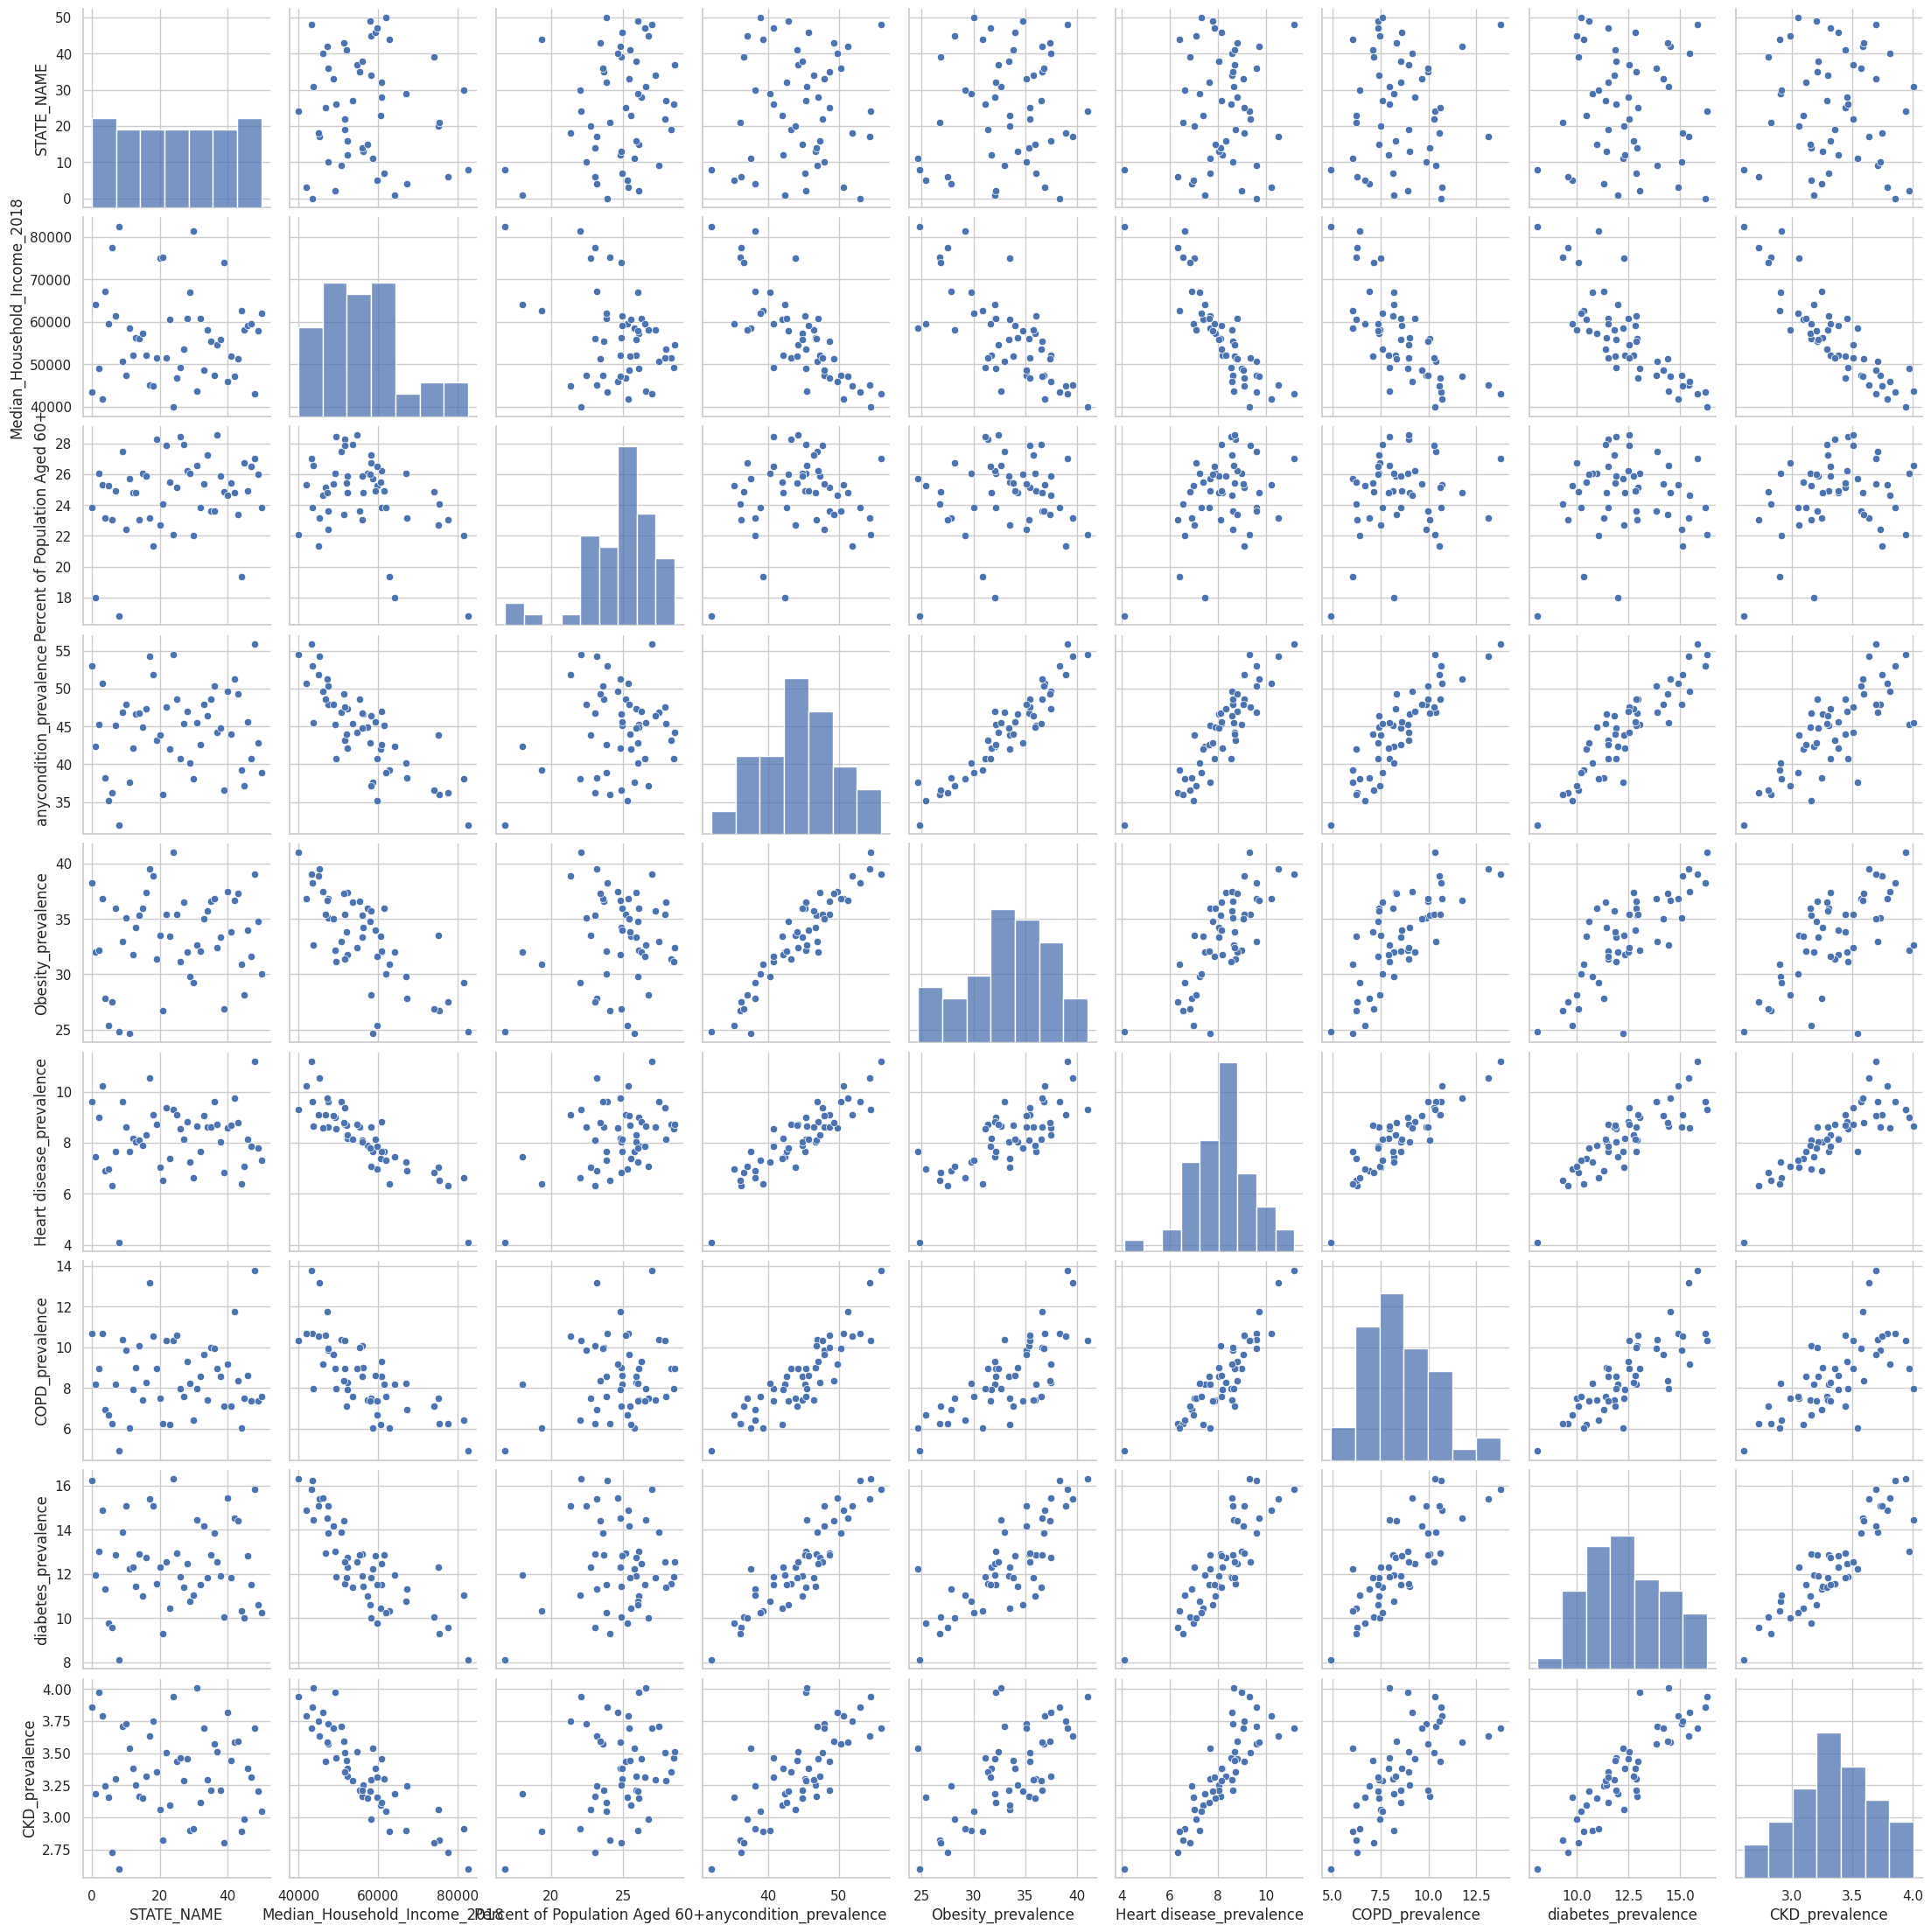

In [14]:
sns.pairplot(data = df)

In [15]:
df.describe()

,STATE_NAME,Median_Household_Income_2018,Percent of Population Aged 60+,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,25.000000,56443.872578,24.697500,44.583153,33.285587,8.204475,8.558842,12.423432,3.354261
std,14.866069,10266.643889,2.434465,5.453419,3.976526,1.230267,1.816070,1.930684,0.337174
min,0.000000,39932.719512,16.800000,32.000000,24.640000,4.100000,4.900000,8.100000,2.600000
25%,12.500000,48898.753333,23.502559,40.771543,31.246429,7.422925,7.379060,11.189122,3.153101
50%,25.000000,55861.895522,24.933333,45.200000,33.529167,8.175000,8.286667,12.300000,3.320000
75%,37.500000,60857.734820,26.046061,47.926481,36.248925,8.902941,9.913853,13.873764,3.591258
max,50.000000,82533.000000,28.544444,55.930909,40.997561,11.181818,13.781818,16.304878,4.009091


<Axes: ylabel='Percent of Population Aged 60+'>

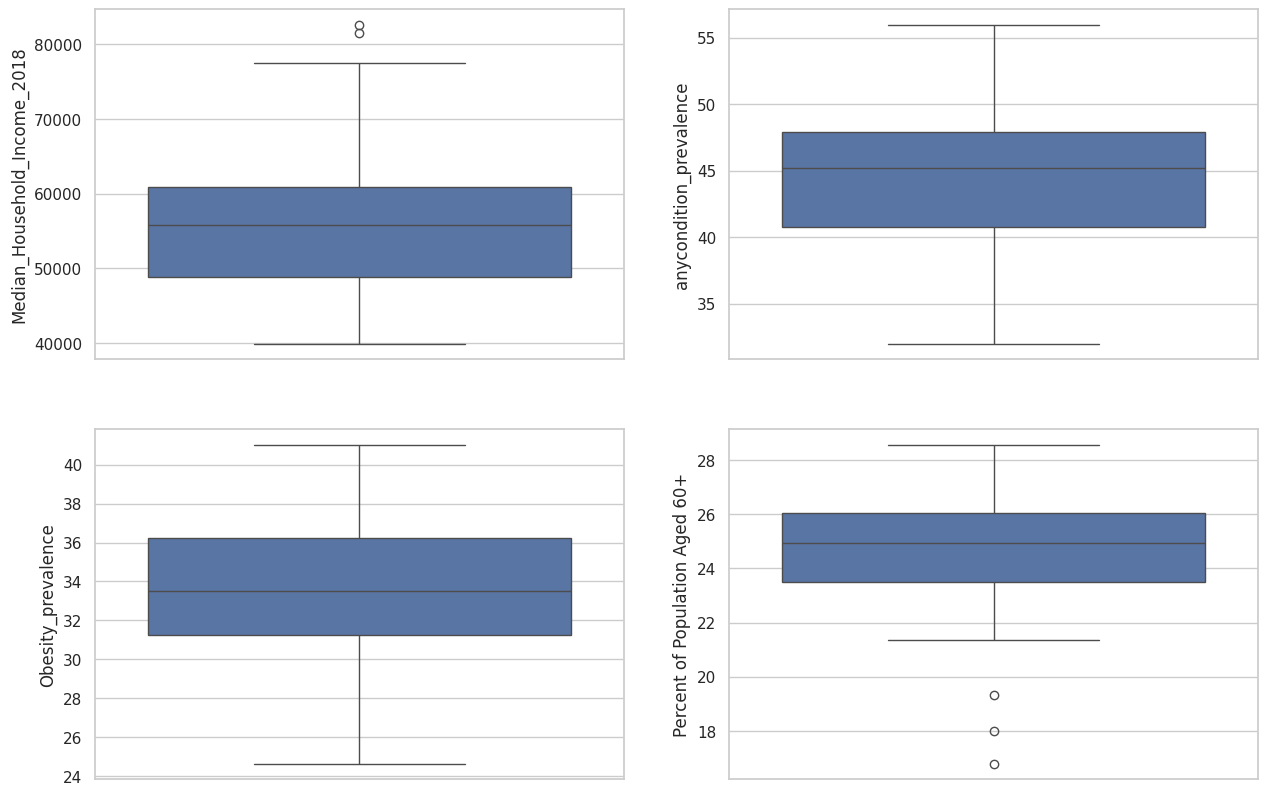

In [17]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(ax = axis[0, 0], data = df, y = "Median_Household_Income_2018")
sns.boxplot(ax = axis[0, 1], data = df, y = "anycondition_prevalence")
sns.boxplot(ax = axis[1, 0], data = df, y = "Obesity_prevalence")
sns.boxplot(ax = axis[1, 1], data = df, y = "Percent of Population Aged 60+")

In [18]:
df.isnull().sum().sort_values(ascending=False) / len(df)

STATE_NAME                        0.0
Median_Household_Income_2018      0.0
Percent of Population Aged 60+    0.0
anycondition_prevalence           0.0
Obesity_prevalence                0.0
Heart disease_prevalence          0.0
COPD_prevalence                   0.0
diabetes_prevalence               0.0
CKD_prevalence                    0.0
dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop("Heart disease_prevalence", axis = 1)
y = df["Heart disease_prevalence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [20]:
y_train.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_y_train.csv", index=False)
y_test.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_y_test.csv", index=False)
X_train.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_X_train.csv", index=False)
X_test.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_X_test.csv", index=False)

In [21]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index)
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index)


dump(scaler, open("/workspaces/EDA_4/models/scaler_std.pk", "wb"))

In [22]:
X_train_norm.head()

,0,1,2,3,4,5,6,7
50,1.592553,0.820420,-0.393446,-1.254632,-1.034310,-0.690028,-1.329247,-1.063396
38,0.802857,0.113865,0.558434,-0.126974,-0.141938,-0.158183,-0.433800,-0.535918
16,-0.644918,-0.311410,0.579479,0.363973,0.936350,-0.307709,0.011809,-0.196489
29,0.210586,1.409531,0.635620,-1.011609,-1.099331,-0.350395,-1.043889,-1.534241
31,0.342202,-1.292706,0.882003,0.003443,-0.337835,-0.487564,0.924241,1.998352


In [ ]:
X_train_norm.to_csv("/workspaces/EDA_4/data/interim/heart_prevalence_X_train_std.csv", index=False)
X_test_norm.to_csv("/workspaces/EDA_4/data/interim/heart_prevalence_X_test_std.csv", index=False)